In [36]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [37]:
import yfinance as yf
df_tesla = yf.download('TSLA')
df_tesla

/tmp/ipython-input-381581191.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_tesla = yf.download('TSLA')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2025-11-20,395.230011,428.940002,394.739990,414.630005,113548800
2025-11-21,391.089996,402.799988,383.760010,402.320007,100460600
2025-11-24,417.779999,421.720001,401.089996,402.170013,96806400
2025-11-25,419.399994,420.480011,405.950012,414.420013,71915600
2025-11-26,426.579987,426.940002,416.890015,423.950012,63463000
2025-11-28,430.170013,432.929993,426.200012,426.589996,36252900
2025-12-01,430.140015,433.660004,425.290009,425.320007,57463600
2025-12-02,429.239990,436.799988,422.119995,430.809998,69336600


##Simple Moving Avg

<Axes: xlabel='Date'>

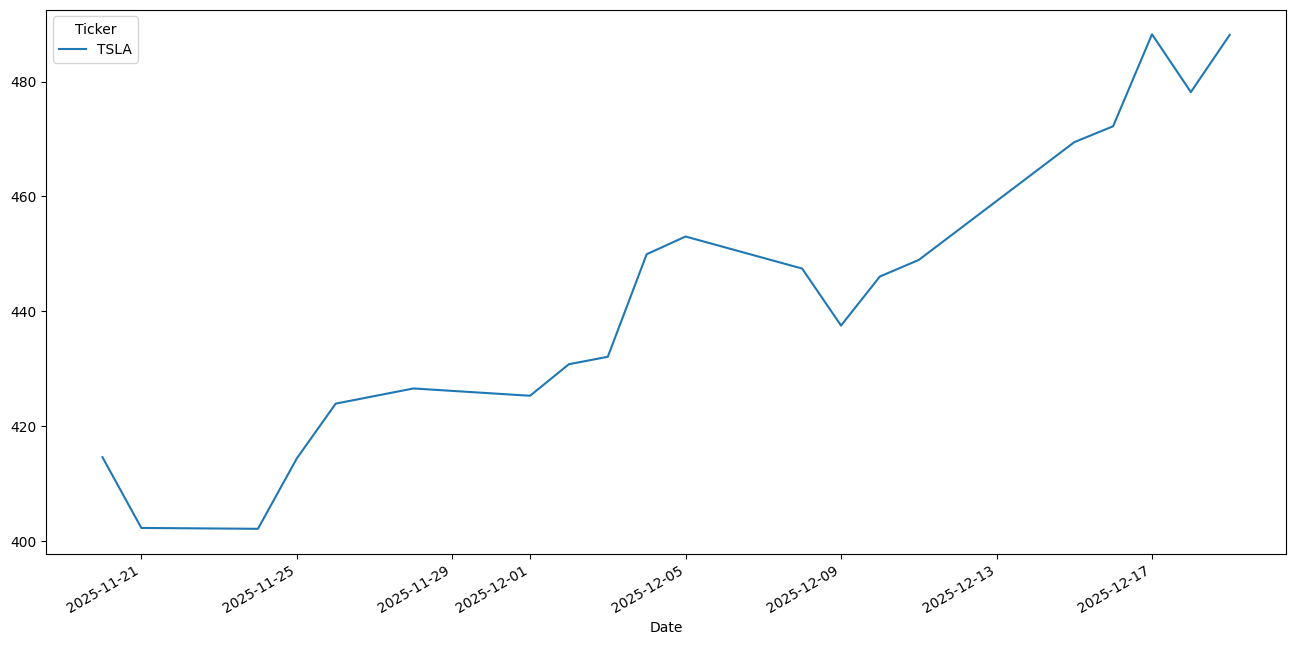

In [38]:
df_tesla['Open'].plot(figsize=(16,8))

<Axes: xlabel='Date'>

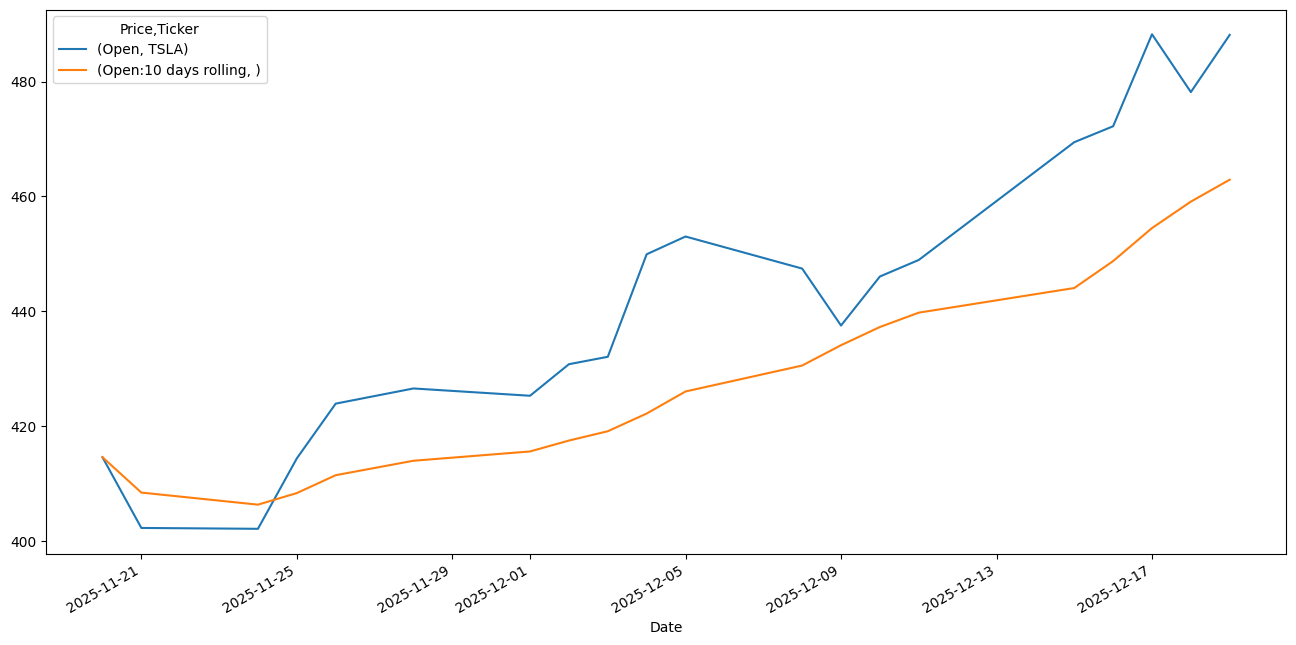

In [39]:
df_tesla['Open:10 days rolling']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()
df_tesla[['Open','Open:10 days rolling']].plot(figsize=(16,8))

<Axes: xlabel='Date'>

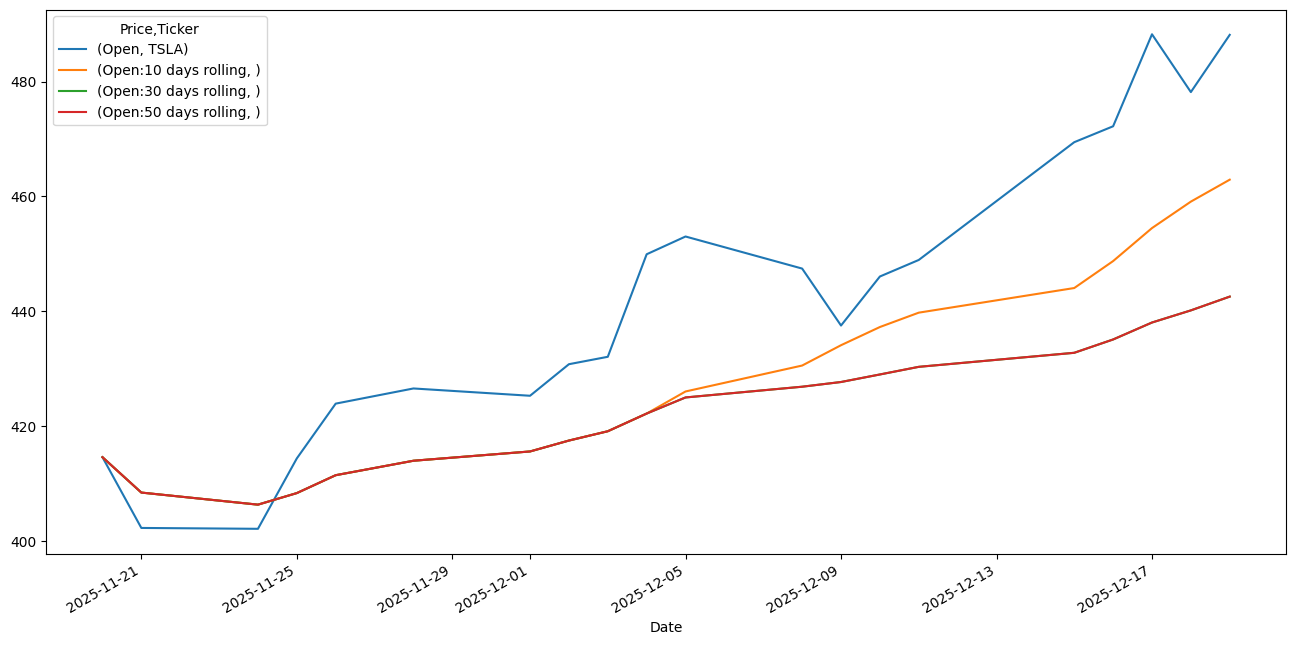

In [40]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open:50 days rolling']=df_tesla['Open'].rolling(window=50,min_periods=1).mean()
df_tesla[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(figsize=(16,8))

### Cumiliting Moving Average

<Axes: xlabel='Date'>

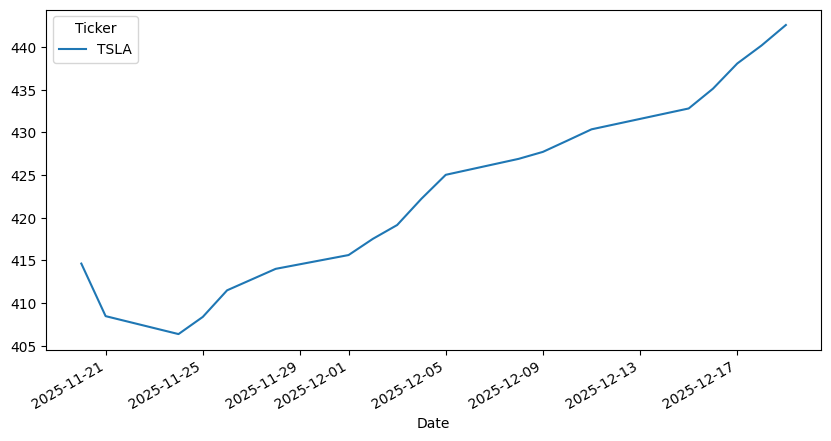

In [41]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

### Exponential Moving  Average

<Axes: xlabel='Date'>

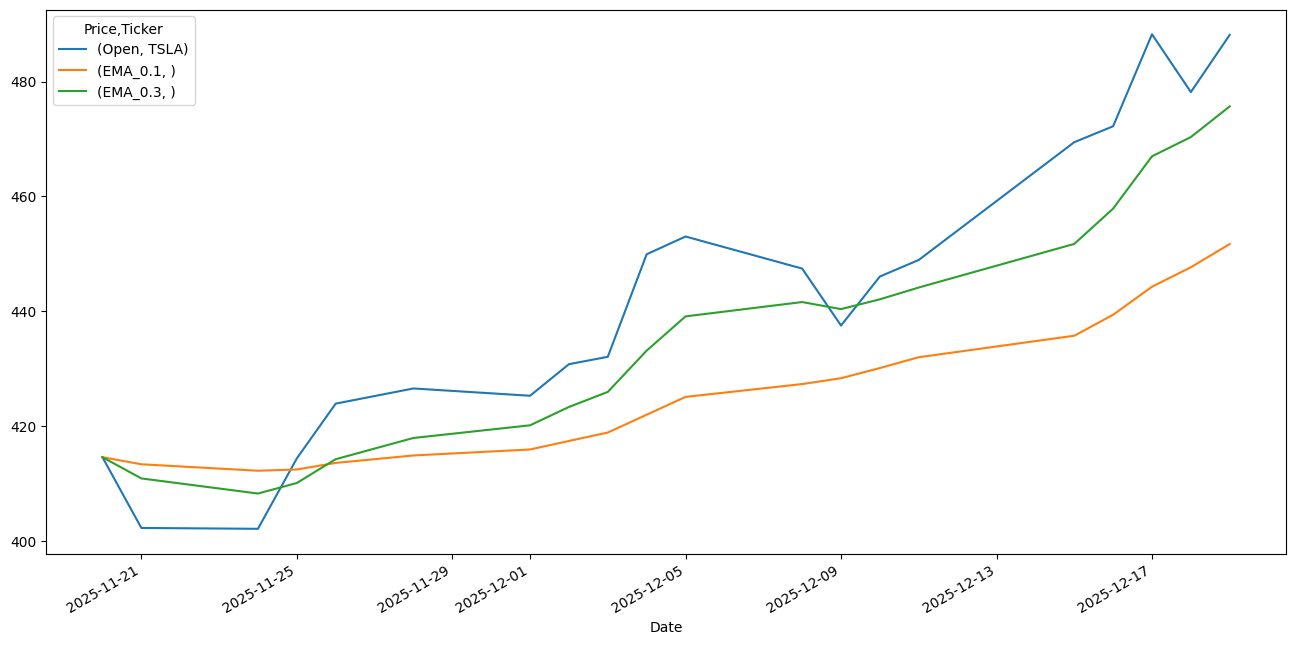

In [42]:
## ema tesla shares
# let the smoothing factor to be - 0.1 and 0.3
df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1,min_periods=1,adjust=False).mean()
df_tesla['EMA_0.3']=df_tesla['Open'].ewm(alpha=0.3,min_periods=1,adjust=False).mean()
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(figsize=(16,8))

### Exponential Weighted Moving Average

<Axes: xlabel='Date'>

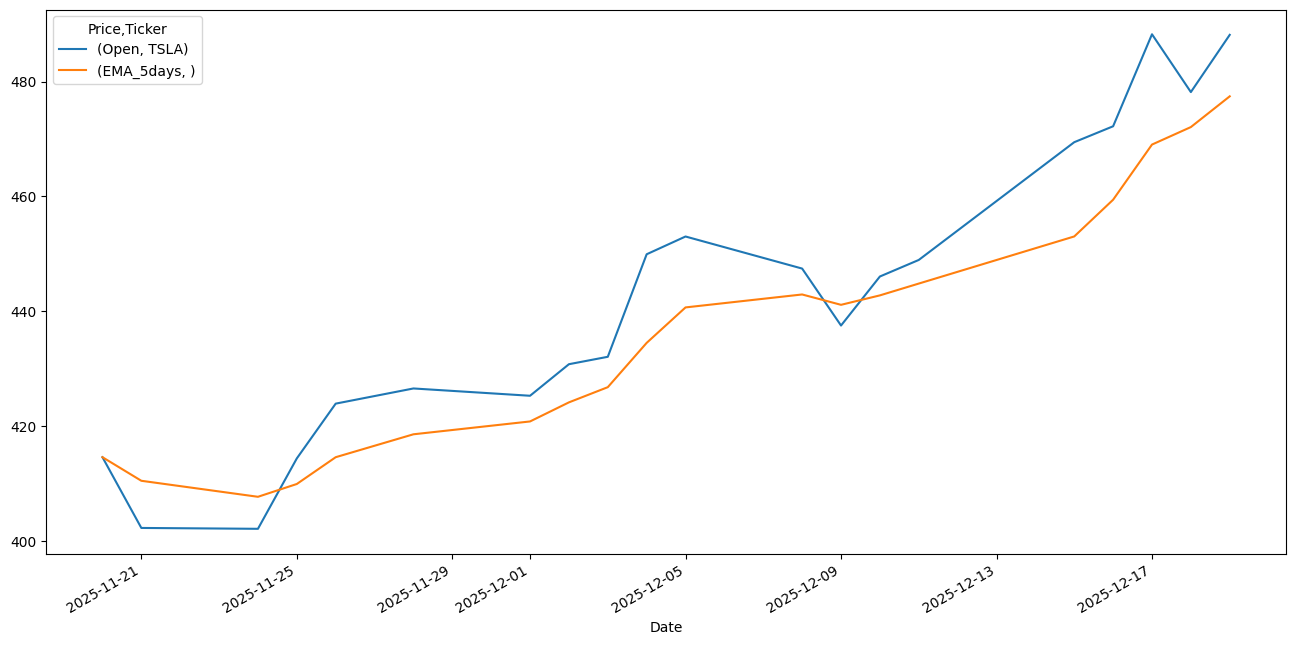

In [43]:
df_tesla['EMA_5days']=df_tesla['Open'].ewm(span=5,min_periods=1,adjust=False).mean()
df_tesla[['Open','EMA_5days']].plot(figsize=(16,8))